In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler # Standardize and scale the variables

# Insight to Data

## US Housing Dataset

In [9]:
df = pd.read_csv('SampleData/USA_Housing.csv')

In [11]:
df.head(2)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [13]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [14]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

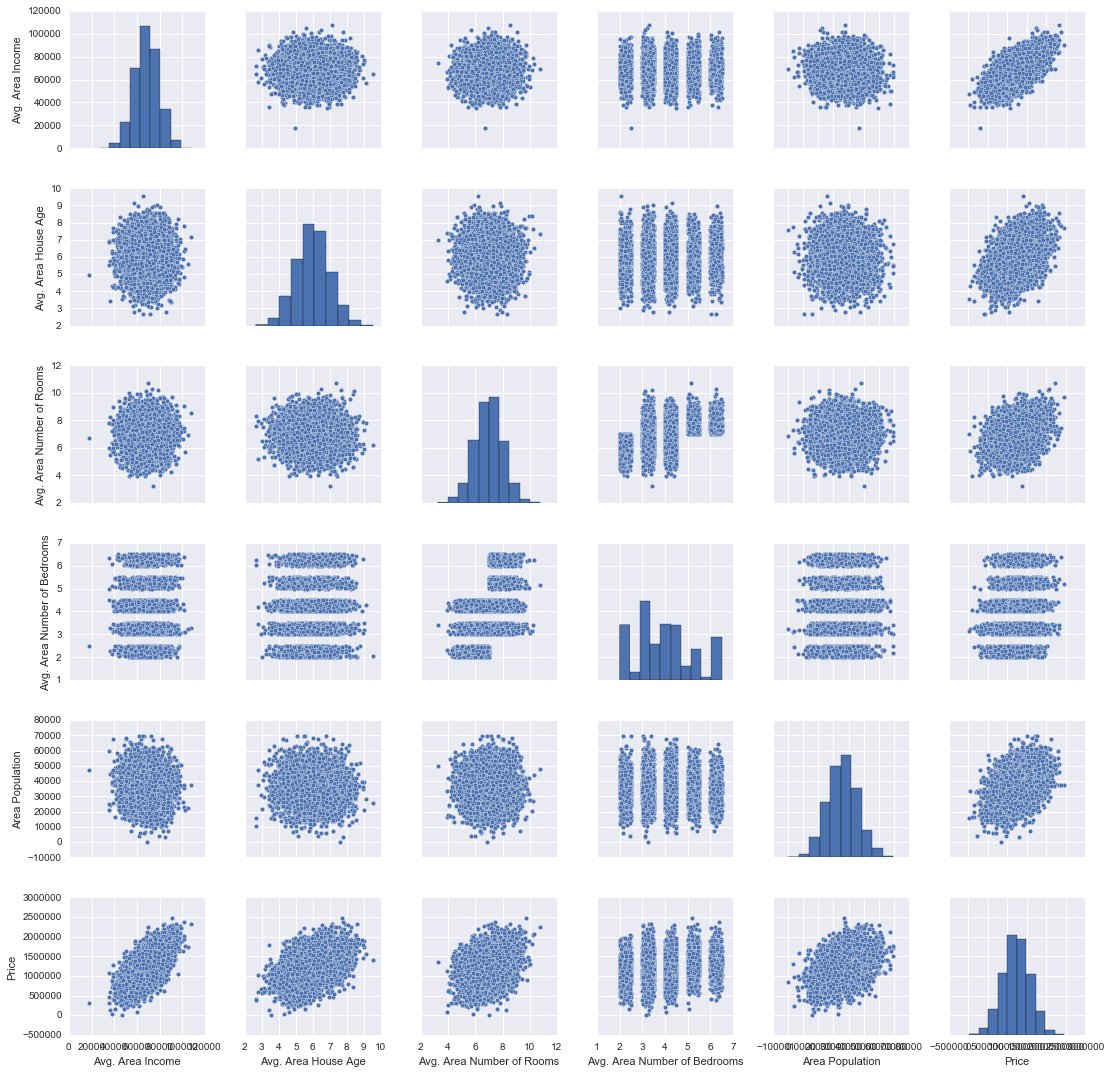

In [15]:
sns.pairplot(df)

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


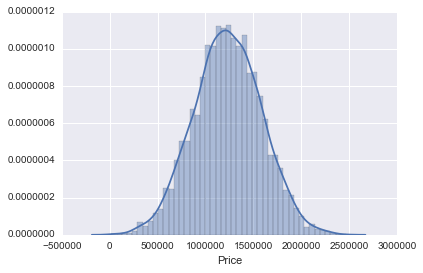

In [17]:
sns.distplot(df['Price'])

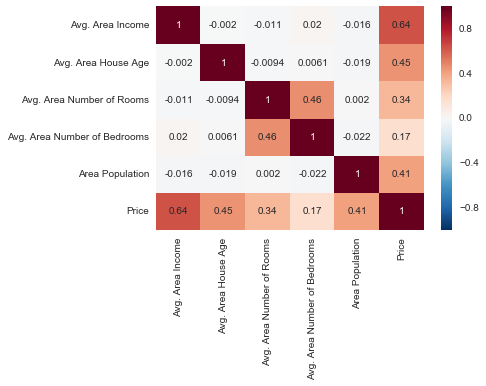

In [19]:
sns.heatmap(df.corr(),annot=True)

## Titanic Dataset

In [147]:
df = pd.read_csv('SampleData/titanic_train.csv')

In [148]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


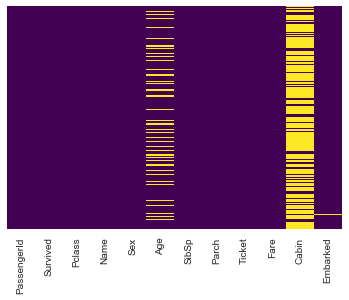

In [149]:
# Missing Data
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

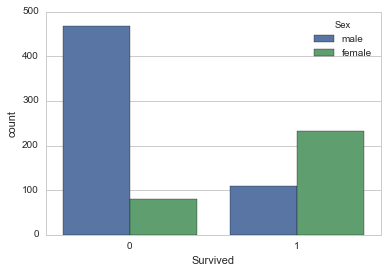

In [150]:
# Surviavals by sex
sns.countplot(data=df, x='Survived',hue='Sex')

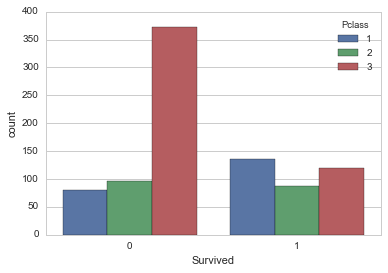

In [151]:
# Surviavals by passenger cabin class
sns.countplot(data=df, x='Survived',hue='Pclass')

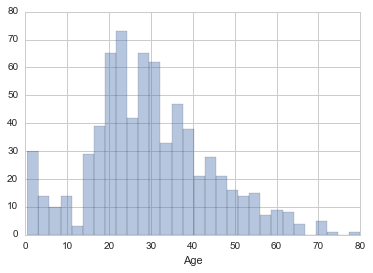

In [152]:
# age dist. of passengers
sns.distplot(df['Age'].dropna(), kde=False, bins=30)

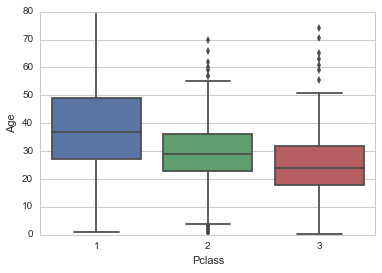

In [153]:
# fill missing values for age by avg age of each class
sns.boxplot(data=df,x='Pclass',y='Age')

In [154]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [155]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

In [156]:
df.drop('Cabin',axis=1,inplace=True)

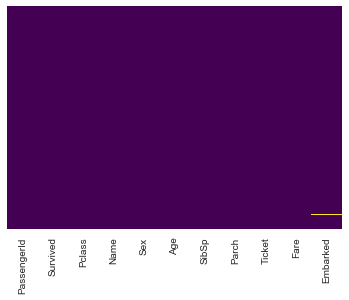

In [157]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [158]:
# categorical variables
# drop first column since they are predictor of each other
sex = pd.get_dummies(df['Sex'],drop_first=True)
sex.head(2)

,male
0,1.0
1,0.0


In [159]:
embark = pd.get_dummies(df['Embarked'],drop_first=True)
embark.head(2)

,Q,S
0,0.0,1.0
1,0.0,0.0


In [160]:
Pclass = pd.get_dummies(df['Pclass'],drop_first=True)
Pclass.head(2)

,2,3
0,0.0,1.0
1,0.0,0.0


In [161]:
df = pd.concat([df,sex,embark,Pclass],axis=1)
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1.0,0.0,1.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0.0,0.0,0.0,0.0,0.0


In [162]:
df.drop(['PassengerId','Pclass','Embarked','Name','Sex','Ticket'],axis=1,inplace=True)
df.head(2)

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1.0,0.0,1.0,0.0,1.0
1,1,38.0,1,0,71.2833,0.0,0.0,0.0,0.0,0.0


# Linear Regression


In [25]:
from sklearn.linear_model import LinearRegression

In [21]:
# data housing price
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

-2640159.79685
[  2.15282755e+01   1.64883282e+05   1.22368678e+05   2.23380186e+03
   1.51504200e+01]
                                      Coeff
Avg. Area Income                  21.528276
Avg. Area House Age           164883.282027
Avg. Area Number of Rooms     122368.678027
Avg. Area Number of Bedrooms    2233.801864
Area Population                   15.150420


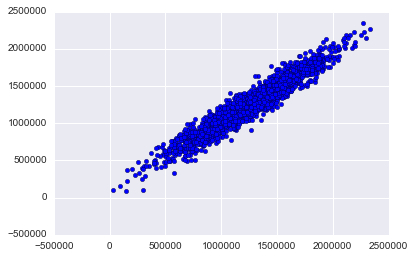

In [34]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

lm = LinearRegression()
lm.fit(X_train,y_train)

print(lm.intercept_)
print(lm.coef_)

cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
print(cdf)

pred = lm.predict(X_test)
plt.scatter(y_test,pred)

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


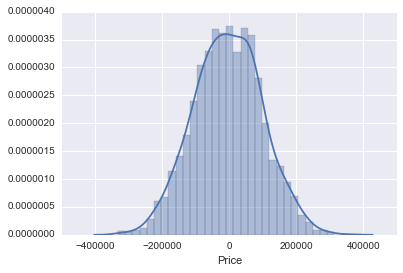

In [35]:
# histogram of residuals
sns.distplot(((y_test-pred)))

In [39]:
# MAE
print(metrics.mean_absolute_error(y_test,pred))
# MSE
print(metrics.mean_squared_error(y_test,pred))
# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test,pred)))

82288.2225191
10460958907.2
102278.829223


# Cancer Data loadin from sklean datasets

In [3]:
from sklearn.datasets import load_breast_cancer

In [8]:
df_main = load_breast_cancer()

In [9]:
df_main.keys()

dict_keys(['target', 'data', 'target_names', 'DESCR', 'feature_names'])

In [7]:
# description of dataset
# print(df_main['DESCR'])

In [10]:
df = pd.DataFrame(df_main['data'],columns=df_main['feature_names'])
df.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


# Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression

In [164]:
X = df.drop('Survived',axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
pred = logmodel.predict(X_test)

print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

# K Nearest Neighbors

In [169]:
df = pd.read_csv('SampleData/Classified Data',index_col=0)

In [170]:
df.head(2)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0


In [174]:
scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [175]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ..., 
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [176]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head(2)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759


In [178]:
from sklearn.neighbors import KNeighborsClassifier

In [179]:
X = df_feat
y = df['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [188]:
# choosing best k value

error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

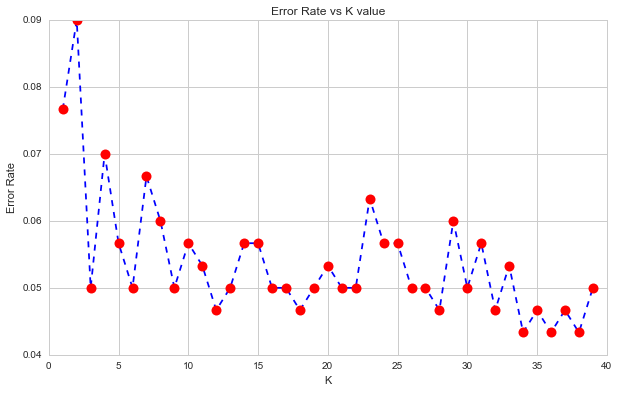

In [189]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [190]:
# lets choos K = 17
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))

             precision    recall  f1-score   support

          0       0.94      0.96      0.95       159
          1       0.96      0.94      0.95       141

avg / total       0.95      0.95      0.95       300



[[153   6]
 [  9 132]]


# Decision Trees / Random Forest

In [4]:
df = pd.read_csv('SampleData/kyphosis.csv')
df.head(2)

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14


In [34]:
# Check the balance of the model
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
pred = dtree.predict(X_test)
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

             precision    recall  f1-score   support

     absent       0.95      0.95      0.95        21
    present       0.75      0.75      0.75         4

avg / total       0.92      0.92      0.92        25

[[20  1]
 [ 1  3]]


In [30]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

In [31]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
pred = dtree.predict(X_test)
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

             precision    recall  f1-score   support

     absent       0.95      0.95      0.95        21
    present       0.75      0.75      0.75         4

avg / total       0.92      0.92      0.92        25

[[20  1]
 [ 1  3]]


# Support Vector Machine - SVM

In [73]:
from sklearn.datasets import load_breast_cancer

In [74]:
data_set = load_breast_cancer()

In [75]:
data_set.keys()

dict_keys(['data', 'target_names', 'feature_names', 'DESCR', 'target'])

In [42]:
# Description of the data
# print(data_set['DESCR'])

In [48]:
df = pd.DataFrame(data_set['data'],columns=data_set['feature_names'])
df.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [76]:
from sklearn.svm import SVC

In [77]:
X = df
y = data_set['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [78]:
model = SVC()
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [79]:
pred = model.predict(X_test)
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        71
          1       0.58      1.00      0.74       100

avg / total       0.34      0.58      0.43       171

[[  0  71]
 [  0 100]]


C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [57]:
# finding all the parameters
from sklearn.grid_search import GridSearchCV

In [59]:
param_grid = {'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [61]:
grid = GridSearchCV(SVC(), param_grid, verbose=3)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.634328 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.636364 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.636364 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.634328 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.636364 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.636364 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................... C=0.1, gamma=0.0001, score=0.901515 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.634328 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.636364 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................... C=1, gamma=1, score=0.636364 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.634328 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.636364 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.636364 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.6s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [62]:
grid.best_params_

{'C': 1, 'gamma': 0.0001}

In [63]:
grid.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [64]:
grid_pred = grid.predict(X_test)
print(classification_report(y_test,grid_pred))
print(confusion_matrix(y_test,grid_pred))

             precision    recall  f1-score   support

          0       0.94      0.94      0.94        67
          1       0.96      0.96      0.96       104

avg / total       0.95      0.95      0.95       171

[[ 63   4]
 [  4 100]]


# K Means Clustering

In [66]:
# generate some data
from sklearn.datasets import make_blobs
data = make_blobs(n_samples=200,n_features=2,centers=4,cluster_std=1.8,random_state=101)

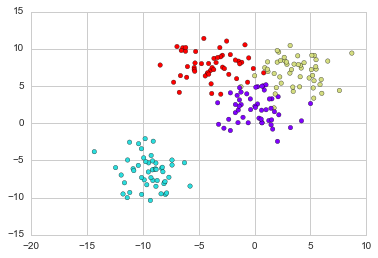

In [68]:
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

In [69]:
from sklearn.cluster import KMeans

In [70]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [71]:
kmeans.cluster_centers_

array([[ 3.71749226,  7.01388735],
       [-9.46941837, -6.56081545],
       [-4.13591321,  7.95389851],
       [-0.0123077 ,  2.13407664]])

In [72]:
kmeans.labels_

array([2, 0, 3, 0, 0, 1, 0, 3, 0, 3, 2, 3, 0, 0, 2, 3, 0, 3, 1, 2, 1, 3, 3,
       1, 2, 1, 1, 3, 0, 0, 2, 1, 0, 3, 3, 2, 1, 1, 1, 3, 1, 2, 2, 2, 3, 0,
       2, 3, 1, 3, 3, 2, 0, 3, 1, 2, 3, 3, 2, 0, 1, 0, 1, 2, 0, 3, 1, 0, 0,
       1, 0, 3, 1, 3, 1, 0, 0, 3, 2, 3, 3, 1, 0, 1, 3, 3, 3, 2, 3, 1, 1, 1,
       1, 3, 3, 1, 0, 2, 1, 0, 3, 1, 3, 3, 0, 3, 1, 0, 1, 1, 0, 2, 2, 0, 1,
       0, 2, 2, 0, 2, 3, 2, 3, 2, 3, 0, 2, 3, 1, 2, 2, 2, 3, 1, 1, 2, 0, 2,
       0, 3, 1, 0, 1, 2, 2, 0, 3, 1, 2, 2, 2, 2, 3, 0, 3, 2, 0, 0, 0, 3, 0,
       3, 3, 2, 1, 2, 3, 0, 2, 3, 0, 3, 2, 0, 3, 2, 0, 0, 1, 0, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 3, 1, 0, 0, 2, 1, 3, 0, 0, 1, 3])

# Principal Component - PCA

In [11]:
# cancer dataset

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [17]:
x_pca = pca.transform(scaled_data)
print(scaled_data.shape)
print(x_pca.shape)

(569, 30)
(569, 2)


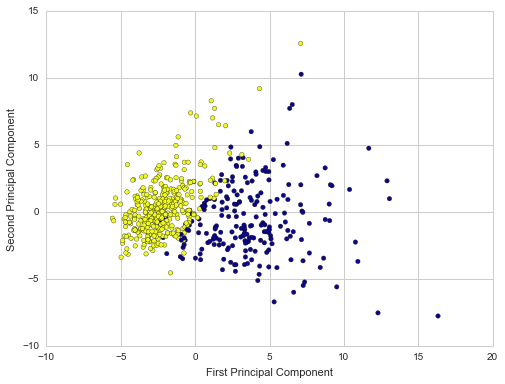

In [18]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df_main['target'],cmap='plasma')
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")

In [19]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

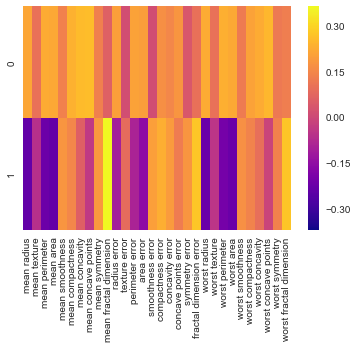

In [21]:
df_comp = pd.DataFrame(pca.components_,columns=df_main['feature_names'])
sns.heatmap(df_comp,cmap='plasma')

# Natural Language Processing

In [3]:
import nltk
from nltk.corpus import stopwords
import string

In [ ]:
# nltk.download_shell()

In [7]:
messages = [line.rstrip() for line in open('SampleData/SMSSpamCollection')]
print(len(messages))

5574


In [17]:
messages = pd.read_csv('SampleData/SMSSpamCollection',sep='\t',names=['label','message'])
messages.head(3)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [18]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [20]:
messages.groupby('label').describe()

message
label                                                          
ham   count                                                4825
      unique                                               4516
      top                                Sorry, I'll call later
      freq                                                   30
spam  count                                                 747
      unique                                                653
      top     Please call our customer service representativ...
      freq                                                    4

In [22]:
messages['length'] = messages['message'].apply(len)

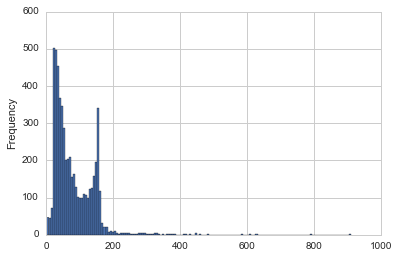

In [23]:
messages['length'].plot.hist(bins=150)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000CFB4B22BE0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000CFB4D574E0>], dtype=object)

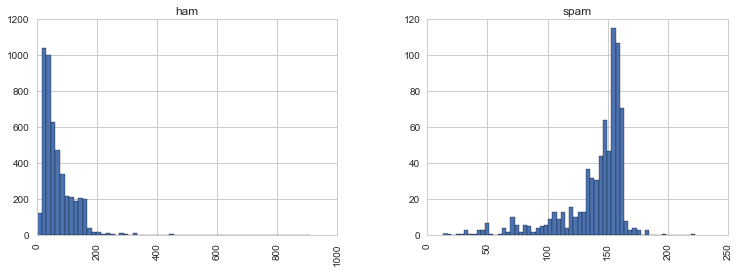

In [24]:
messages.hist(column='length',by='label',bins=60,figsize=(12,4))

In [26]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [28]:
# removing all punctuations
sample_text = 'Sample message! Notice: it has punctuation.'

no_punctuation = [c for c in sample_text if c not in string.punctuation]
no_punctuation = ''.join(no_punctuation)
no_punctuation

'Sample message Notice it has punctuation'

In [29]:
no_punctuation.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [32]:
# to remove common english words we can use nltk stopwords

clean_text = [word for word in no_punctuation.split() if word.lower() not in stopwords.words('english')]
clean_text

['Sample', 'message', 'Notice', 'punctuation']

In [36]:
def text_process(text):
    """
    1. Remove puctuation
    2. Remove common words
    3. Return list of clean text words
    """
    no_punc = [char for char in text if char not in string.punctuation]
    no_punc = ''.join(no_punc)
    return [word for word in no_punc.split() if word.lower() not in stopwords.words('english')]

In [37]:
# as an example
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [38]:
# Vectorizing
from sklearn.feature_extraction.text import CountVectorizer

In [39]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [41]:
print('Total number of words: ',len(bow_transformer.vocabulary_))

Total number of words:  11425


In [46]:
message4 = messages['message'][3]
print(message4)

U dun say so early hor... U c already then say...


In [48]:
# bag of words
bow4 = bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2
(1, 11425)


In [49]:
# getting out a word from the vector
bow_transformer.get_feature_names()[9554]

'say'

In [50]:
# building the complete bag of words
messages_bow = bow_transformer.transform(messages['message'])

In [51]:
print('Shape of sparse matrix: ',messages_bow.shape)

Shape of sparse matrix:  (5572, 11425)


In [53]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.07940295412668218


In [54]:
# TF-IDF stands for term frequency-inverse document frequency, and the tf-idf weight is a weight often used in information 
# retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in 
# a collection or corpus.

In [55]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 9554)	0.538562626293
  (0, 7186)	0.438936565338
  (0, 6222)	0.318721689295
  (0, 6204)	0.299537997237
  (0, 5261)	0.297299574059
  (0, 4629)	0.266198019061
  (0, 4068)	0.408325899334


In [56]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

8.5270764989


In [57]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(5572, 11425)


In [58]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])
print('predicted:', spam_detect_model.predict(tfidf4)[0])
print('expected:', messages.label[3])

predicted: ham
expected: ham


In [59]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [61]:
msg_train, msg_test, label_train, label_test = \
train_test_split(messages['message'], messages['label'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

4457 1115 5572


In [62]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x000000CFB4E21C80>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [63]:
predictions = pipeline.predict(msg_test)
print(classification_report(predictions,label_test))

             precision    recall  f1-score   support

        ham       1.00      0.96      0.98      1017
       spam       0.72      1.00      0.84        98

avg / total       0.98      0.97      0.97      1115

